In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('googleplaystore_user_reviews.csv')
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:
data=pd.concat([df.Translated_Review,df.Sentiment], axis=1)
data.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive


In [4]:
data.dropna(inplace=True, axis=0)
data.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive


In [5]:
data.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [6]:
data.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [7]:
data.Sentiment=data.Sentiment.replace('Positive', 0)
data.Sentiment=data.Sentiment.replace('Negative', 1)
data.Sentiment=data.Sentiment.replace('Neutral',2)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

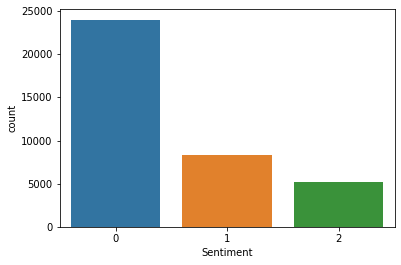

In [9]:
sns.countplot(data.Sentiment)

In [10]:
import re
import nltk
from nltk.corpus import stopwords

In [11]:
text_list=[]
for i in data.Translated_Review:
    text=re.sub("[^a-zA-Z]", " ", i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nltk.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)
text_list[:5]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer(max_features=1000)
count_vec.fit(text_list)
matrix=count_vec.transform(text_list).toarray()
all_words=count_vec.get_feature_names()
all_words[:50]

['ability',
 'able',
 'about',
 'absolutely',
 'access',
 'account',
 'accurate',
 'across',
 'action',
 'activity',
 'actual',
 'actually',
 'ad',
 'add',
 'added',
 'addicted',
 'addicting',
 'addictive',
 'adding',
 'advert',
 'advertisement',
 'after',
 'again',
 'age',
 'ago',
 'alarm',
 'alert',
 'all',
 'allow',
 'allows',
 'almost',
 'along',
 'alot',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'amazon',
 'amount',
 'an',
 'and',
 'android',
 'anime',
 'annoying',
 'another',
 'answer',
 'any',
 'anymore']

In [13]:
y=data.iloc[:,1].values
x=matrix

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2, random_state=1)

In [16]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
nb.score(xtest, ytest)

0.5903018968741651

In [17]:
ypred=nb.predict(xtest)

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

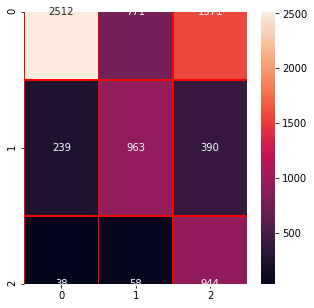

In [29]:
cm=confusion_matrix(ytest, ypred)
plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f")
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)
rf.score(xtest,ytest)

0.9109003473149879

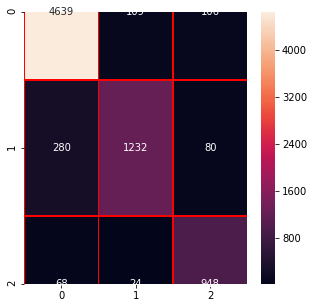

In [33]:
ypred=rf.predict(xtest)
cm=confusion_matrix(ytest, ypred)
plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f")
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9011488111140796

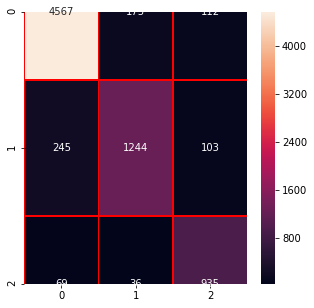

In [36]:
ypred=lr.predict(xtest)
cm=confusion_matrix(ytest, ypred)
plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f")
plt.show()